## Exercise 6: Simple Features

These exercises will introduce you to **feature extraction**. In this exercise you will write the code for the Harris corner detector as well as try the Canny edge detector.

### Programming exercises: Harris corner detector

You will implement the Harris corner detector and apply it to the image `TestIm1.png` to test that your implementation is correct. Furthermore you should test the Harris corner detector on some of the other images.

- **Exercise 6.1**. To start with, create the function `g, gx = gaussian1DKernel(sigma)`, where `g` is the 1D Gaussian kernel, `gx` is the derivative of `g`, and `sigma` is the Gaussian width.

In this function, you have a choice: what length should my Gaussian kernel have? What is gained by setting the length to `sigma`, `2 · sigma`, or `6 · sigma`?


In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [59]:
def gaussian1DKernel(sigma):
    h=np.ceil(4*sigma)
    x = np.arange(-h,h+1)
    
    g= 1/(sigma*np.sqrt(2*np.pi))*np.exp(-x**2/(2*sigma**2))
    gx=(-x/sigma**2)*g
    
    gx=gx.reshape(-1,1)
    g=g.reshape(-1,1)
    
    return g,gx


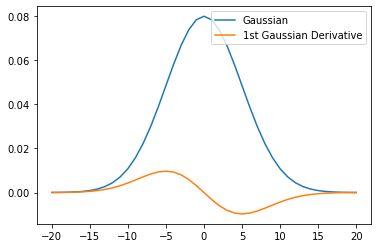

In [60]:
sigma=5

g, gx = gaussian1DKernel(sigma)

plt.plot(x,g,label='Gaussian')
plt.plot(x,gx,label='1st Gaussian Derivative')
plt.legend()
plt.show()

- **Exercise 6.2**. Now create the function `I, Ix, Iy = gaussianSmoothing(im, sigma)`, where `I` is the Gaussian smoothed image of `im`, and `Ix` and `Iy` are the smoothed derivatives of the image im. The `im` is the original image and `sigma` is the Gaussian width.

Using the `g, gx = gaussian1DKernel(sigma)` function, how would you do 2D smoothing? 

- Tip: Using a 1D kernel in one direction e.g. x is independent of kernels in the other directions.
- What happens if sigma = 0? What should the function return if it supported that? 
- Use the smoothing function on your test image. Do the resulting images look correct?

In [61]:
def gaussianSmoothing(im,sigma):
    
    [g,gx]=gaussian1DKernel(sigma)
    
    # we have to apply to convolutions g*gx*I
    I1=cv2.filter2D(im,-1,kernel=g) # we apply the convolution in the vertical direction
    Ix=cv2.filter2D(I1,-1,kernel=gx.T) # we apply the convolution in the horizontal direction
        
    # to obtain Iy we apply the convolution in the inverse way as Ix
    I2=cv2.filter2D(im,-1,kernel=g.T) 
    Iy=cv2.filter2D(I2,-1,kernel=gx) 
    
    # Gaussian smoothed image(double convolution to consider x and y directions).
    I=cv2.filter2D(cv2.filter2D(im,-1,kernel=g),-1,kernel=g.T)
    
    return I,Ix,Iy


In [62]:
im=cv2.imread('week06_data/TestIm1.png',0)

[I,Ix,Iy]=gaussianSmoothing(im,sigma=10)


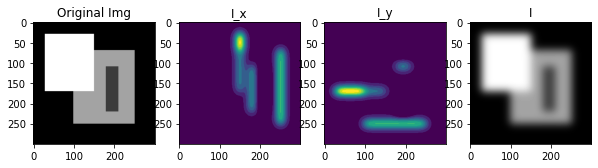

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.imshow(im,cmap='gray');plt.title('Original Img')
plt.subplot(1,4,2)
plt.imshow(Ix);plt.title('I_x')
plt.subplot(1,4,3)
plt.imshow(Iy);plt.title('I_y')
plt.subplot(1,4,4)
plt.imshow(I,cmap='gray');plt.title('I')
plt.show()

- **Exercise 6.3**. Now create the function `C = smoothedHessian(im, sigma, epsilon)` where

$$ C(x,y) = \begin{bmatrix} g_ε*I_x^2(x,y) & g_ε*I_x(x,y)I_y(x,y) \\ g_ε*I_x(x,y)I_y(x,y) & g_ε*I_y^2(x,y) \end{bmatrix}$$


and $g_ε ∗ . . .$ is the convolution of a new Gaussian kernel with width `epsilon`.

Use the smoothed Hessian function on your test image. Do the resulting images still look correct?
We use two Gaussian widths in this function: `sigma` and `epsilon`. The first one `sigma` is used to calculate the derivatives and the second one to calculate the Hessian. Do we need to use both? If you don’t know the answer, start on the next exercise and return to this question afterwards.



In [64]:
def smoothedHessian(im, sigma, epsilon):
    #To do convolution of a new Gaussian kernel with width epsilon.
    [g,gx]=gaussian1DKernel(epsilon)
    
    [I,Ix,Iy]=gaussianSmoothing(im,sigma)
    
    a=cv2.filter2D(Ix**2,-1,kernel=g)
    b=cv2.filter2D(Iy**2,-1,kernel=g)
    c=cv2.filter2D(Ix*Iy,-1,kernel=g)
    
    C=np.array([[a,c],[c,b]])
    return C

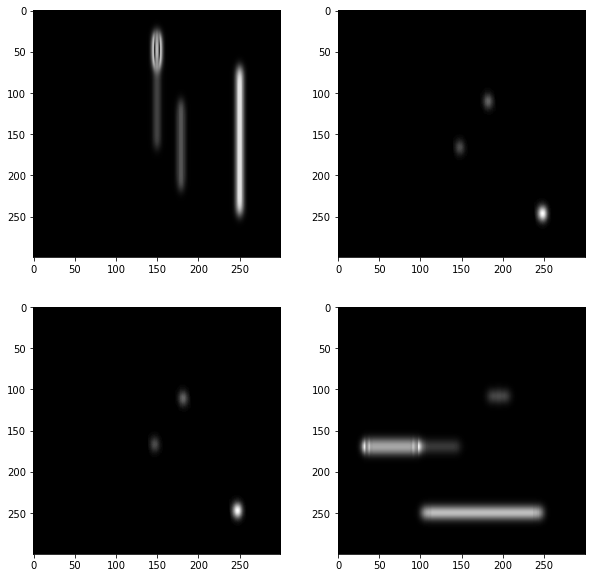

In [69]:
C=smoothedHessian(im,5,5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1);plt.imshow(C[0][0],cmap='gray')
plt.subplot(2,2,2);plt.imshow(C[0][1],cmap='gray')
plt.subplot(2,2,3);plt.imshow(C[1][0],cmap='gray')
plt.subplot(2,2,4);plt.imshow(C[1][1],cmap='gray')
plt.show()

- **Exercise 6.4**. Create the function `r = harrisMeasure(im, sigma, epsilon, k)` where

$$ r(x,y)=a·b−c^2 −k(a+b)^2 $$ where,
$$ c(x,y) = \begin{bmatrix} a & c \\ c & b \end{bmatrix}$$

Now return to the question from last exercise.
Tip: What happens to r if you set `sigma = 0` or `epsilon = 0`? Take a look at the lecture notes, equations (4.6) and (4.7) and the equations in between. It is essential that $epsilon \neq 0$, why is that?
Use the `harrisMeasure` function on your test image. Are there large values near the corners.

In [70]:
def harrisMeasure(im, sigma, epsilon, k):
    [g,gx]=gaussian1DKernel(epsilon)
    [I,Ix,Iy]=gaussianSmoothing(im,sigma)
    a=cv2.filter2D(Ix**2,-1,kernel=g)
    b=cv2.filter2D(Iy**2,-1,kernel=g)
    c=cv2.filter2D(Ix*Iy,-1,kernel=g)
    r=a*b-c**2-k*(a+b)**2
    return r

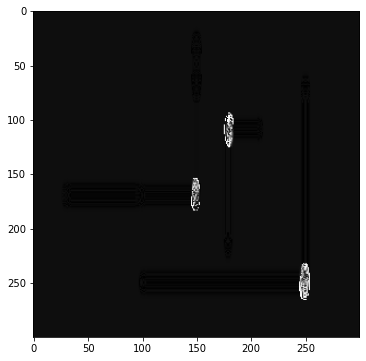

In [77]:
r=harrisMeasure(im,2,5,0.06)
plt.figure(figsize=(6,6))
plt.imshow(r,cmap='gray')
plt.show()

In [78]:
r.shape

(300, 300)

- **Exercise 6.5**. Finally, create the function `c = cornerDetector(im, sigma, epsilon, k, tau)` where `c` is a list of points where `r` is the local maximum and larger than some relative threshold i.e.

$$ r(x, y) > tau $$

To get local maxima, you should implement non-maximum suppression, see Sec. 4.3.1 in the LN.
Non-maximum suppression ensures that $r(x, y) > r(x ± 1, y)$ and $r(x, y) > r(x, y ± 1)$.
Use the corner detector on your test image. Does it find all the corners, or too many corners?


In [79]:
def cornerDetector(im, sigma, epsilon, k, tau):
    r=harrisMeasure(im,sigma,epsilon,k)
    c=np.zeros(r.shape)
    for i,row in enumerate(r):
        for j,el in enumerate(row):
             if el>tau:
                    c[i,j]=255 
    return c

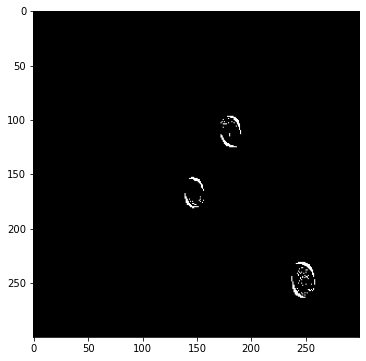

In [90]:
c=cornerDetector(im,5,4,0.1,200)
plt.figure(figsize=(6,6))
plt.imshow(c,cmap='gray')
plt.show()

### Programming exercises: Canny edge detection

Just like many other imaging operations the Canny edge detector is available in both Matlab and OpenCV. Instead of implementing it ourselves, let us start using someone else’s implementation.

- **Exercise 6.6**. Figure out how to run the Canny edge detector in your language and apply it to the two images TestIm1.png and TestIm2.png.



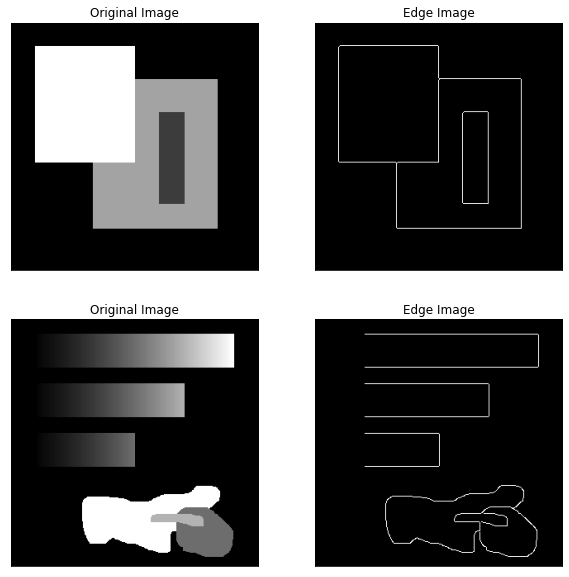

In [100]:
img1=cv2.imread('week06_data/TestIm1.png',0)
img2=cv2.imread('week06_data/TestIm2.png',0)

# Setting parameter values, lower and upper Threshold
edges1 = cv2.Canny(img1,100,200)
edges2 = cv2.Canny(img2,100,200)
plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

- **Exercise 6.7**. What is the effect of the threshold parameters in the Canny edge detector. Try them out specifically on TestIm2.png?

In [107]:
def canny_detector(img,minval,maxval,aperture_size):
    edges = cv2.Canny(img,minval,maxval,aperture_size)
    plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

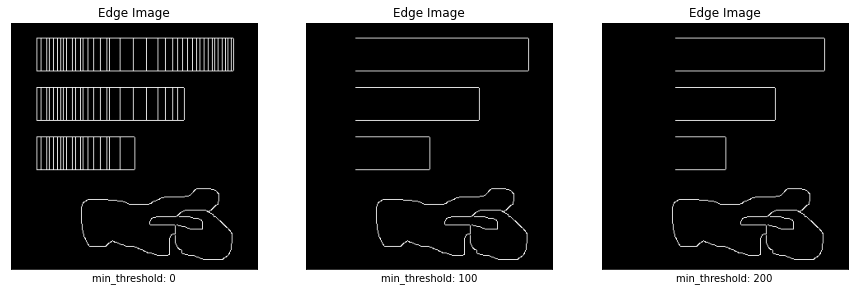

In [108]:
# let's try to change the threshold parameters:
plt.figure(figsize=(15,20))
for i,v in enumerate([0,100,200]):
    plt.subplot(1,3,i+1);plt.xlabel('min_threshold: '+ str(v))
    canny_detector(img2,v,200,3)
plt.show()

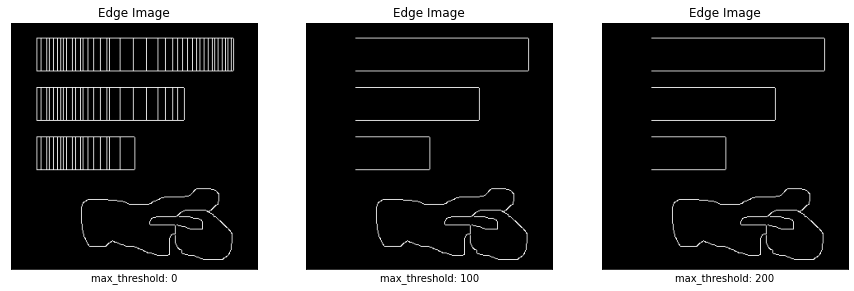

In [109]:
plt.figure(figsize=(15,20))
for i,v in enumerate([0,100,200]):
    plt.subplot(1,3,i+1);plt.xlabel('max_threshold: '+ str(v))
    canny_detector(img2,100,v,3)
plt.show()

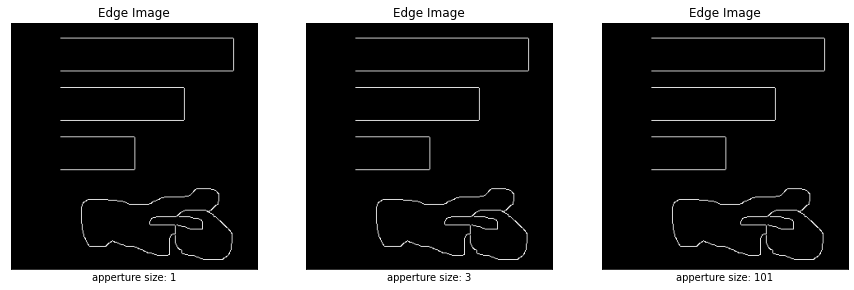

In [110]:
plt.figure(figsize=(15,20))
for i,v in enumerate([1,3,101]):
    plt.subplot(1,3,i+1);plt.xlabel('apperture size: '+ str(v))
    canny_detector(img2,100,200,v)
plt.show()